## Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()

In [3]:
X = iris["data"][:,(2,3)]

In [5]:
y = (iris.target == 0).astype(np.int)

In [8]:
per_clf = Perceptron()

In [9]:
per_clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
y_pred = per_clf.predict([[2, 0.5]])

In [18]:
y_pred

array([0])

In [20]:
import tensorflow as tf

In [21]:
from tensorflow import keras


In [22]:
tf.__version__

'2.3.0'

In [23]:
keras.__version__

'2.4.0'

In [24]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 37s 8us/step


In [25]:
X_train_full.shape

(60000, 28, 28)

In [26]:
X_train_full.dtype

dtype('uint8')

In [27]:
X_valid,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0

In [28]:
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]

In [29]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [30]:
class_names[y_train[0]]

'Coat'

In [31]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.layers[1].name

'dense'

In [42]:
weights, biases = model.layers[2].get_weights()

In [43]:
weights

array([[ 0.00046624, -0.04170938, -0.08641166, ..., -0.06862862,
        -0.02456037, -0.06635507],
       [ 0.11773337,  0.00141668,  0.08001729, ..., -0.01459441,
        -0.07457119, -0.03611045],
       [ 0.00611665, -0.03561168, -0.08782542, ..., -0.12235824,
        -0.02712709,  0.10988969],
       ...,
       [ 0.06774045,  0.01755834,  0.09553135, ...,  0.06949762,
         0.02524888, -0.03522095],
       [-0.10081097, -0.09679765, -0.02763352, ..., -0.03285019,
        -0.04028876,  0.07844395],
       [ 0.00201119, -0.02630882, -0.03691737, ..., -0.02763626,
        -0.00452267, -0.05295312]], dtype=float32)

In [44]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [45]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [46]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7166 - accuracy: 0.7595 - val_loss: 0.5139 - val_accuracy: 0.8326
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4891 - accuracy: 0.8313 - val_loss: 0.4666 - val_accuracy: 0.8346
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4413 - accuracy: 0.8448 - val_loss: 0.4101 - val_accuracy: 0.8628
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4142 - accuracy: 0.8545 - val_loss: 0.3994 - val_accuracy: 0.8612
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3942 - accuracy: 0.8622 - val_loss: 0.3899 - val_accuracy: 0.8626
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3775 - accuracy: 0.8667 - val_loss: 0.3765 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3647 - accuracy: 0.8714 - val_loss: 0.3643 - val_accuracy:

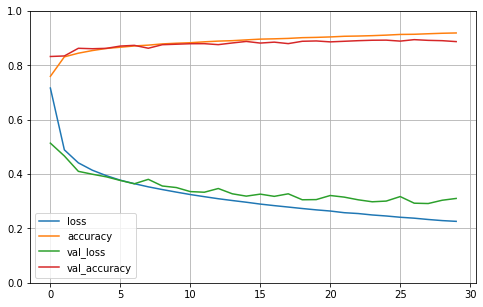

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [48]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [54]:
history.history

{'loss': [0.7165845632553101,
  0.4891469478607178,
  0.4413117468357086,
  0.41418763995170593,
  0.39417195320129395,
  0.37747183442115784,
  0.36466920375823975,
  0.3530423045158386,
  0.34304261207580566,
  0.33366072177886963,
  0.32471969723701477,
  0.31689804792404175,
  0.3093135356903076,
  0.30271488428115845,
  0.2964315116405487,
  0.28959622979164124,
  0.28392672538757324,
  0.2786777913570404,
  0.2732889950275421,
  0.26833072304725647,
  0.26409071683883667,
  0.2579316794872284,
  0.25479692220687866,
  0.24957267940044403,
  0.245825856924057,
  0.24116675555706024,
  0.23773309588432312,
  0.23293015360832214,
  0.22885382175445557,
  0.22608712315559387],
 'accuracy': [0.7595454454421997,
  0.8313272595405579,
  0.8447636365890503,
  0.854454517364502,
  0.8621818423271179,
  0.8667091131210327,
  0.871363639831543,
  0.8744181990623474,
  0.8788909316062927,
  0.8814181685447693,
  0.8832908868789673,
  0.8866181969642639,
  0.8892545700073242,
  0.890818178653

In [56]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 55.9556 - accuracy: 0.8604


[55.95558166503906, 0.8604000210762024]

In [75]:
X_new = X_test[:7]

In [76]:
y_proba = model.predict(X_new)

In [77]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [78]:
y_pred = model.predict_classes(X_new)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [79]:
y_pred

array([9, 2, 1, 1, 6, 1, 4])

In [81]:
np.argmax(model.predict(X_new),axis=1)

array([9, 2, 1, 1, 6, 1, 4])

In [82]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat'], dtype='<U11')